# You have taken your videos, but what REALLY is going on in your samples?

Rather than manually track how your beads, DNA samples, or active particles are moving, we are going to use a nifty technique called Differential Dynamic Microscopy to exract important the information. 

So, let's begin. Load in all of the python modules in the following cell. (It's ok for the red warning signs to appear...It will still run!)

In [29]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt

from IPython.html.widgets import interact, fixed
import ipywidgets as widgets

import io 

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               'size': 10,
              }
import tiff_file
import sys
import glob #glob is helpful for searching for filenames or directories
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
import pickle #for saving data

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "C:\ProgramData\Anaconda2\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\ProgramData\Anaconda2\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda2\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\ProgramData\Anaconda2\lib\site-

In [30]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

#import mpld3

# Use seaborn styles for nice-looking plots
#import seaborn; seaborn.set()

Load in the data directory. I like to have a separate folder for just .tif files, to keep things more organized. You can do this or a different system. 

The function glob.glob will pull out files with the specific qualities that you require. Here we want files ending with 'ome.tif' so we add the ** in front of 'ome.tif' to mark that there can be anything before the ome.tif. 

If there are multiple files they will then be sorted into the list named files.

In [31]:

#Data_dir = "Z:\\Ryan C\\Data\\DDM_Karthik\\20210715\\"
Data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\"
files = glob.glob(Data_dir+"**.tif")
files.sort()
print("Found %i files" % len(files))
for f in files: print('\t'+f.split('\\')[-1])

Found 6 files
	Trial_15.tif
	Trial_2.tif
	Trial_25.tif
	Trial_3.tif
	Trial_39.tif
	Trial_5.tif


In [32]:
im = tiff_file.imread(files)

Next we will set a few parameters and limits for our analysis.

You will have taken videos with upwards of 1000 frames (for DNA videos they are perferably 3000+). These videos can be broken up into groups of different frame differences. We can control what the frame differences are by changing the endframelag variable. 

We have mostly used 998, 1998, and 2998 depending on the number of frames in the video. For more than 3000 frames I tend to use 2998. 

We can also change the number of values sampled out of those different time lags (frame differences). Usually we choose 400, but for a quick overview of how the code work we can stick with 20. 

In [33]:
endframelag = 1000
numvaluessampled = 500

dts = ddm.genLogDist(1,endframelag,numvaluessampled)


Now we are going to set the region of interest we are going to analyze. FFTs work well with dimensions of 2^n, so keep that in mind when choosing your region of interest (ROI). 

For DNA videos we have been doing 256x256 px ROIs, usually the videos are 1280x256 so we get 5 ROIs per video.

In the cell below, label your ROI in the variable ROI (if you were to do more ROIs you can label them in a list form)

Only one ROI: run the cell below

There is a separate version (two cells down) if you have multiple ROIs to run

Now, the actual meat of the code! This for loop will run through all of the videos in the list named files (from earlier cell). This will only analyze one ROI and will do so for the region you created above.

All of the FFT files will be saved to the file where the videos are taken from, but you can move them after the code has finished. 

This code can take a while to run, especially if the numvaluessampled variable is 400. 

Run the next cell to truly begin analysis

In [34]:
test_px = tiff_file.imread(files[0])


In [35]:
test_px.shape

(3000L, 900L, 600L)

<IPython.core.display.Javascript object>


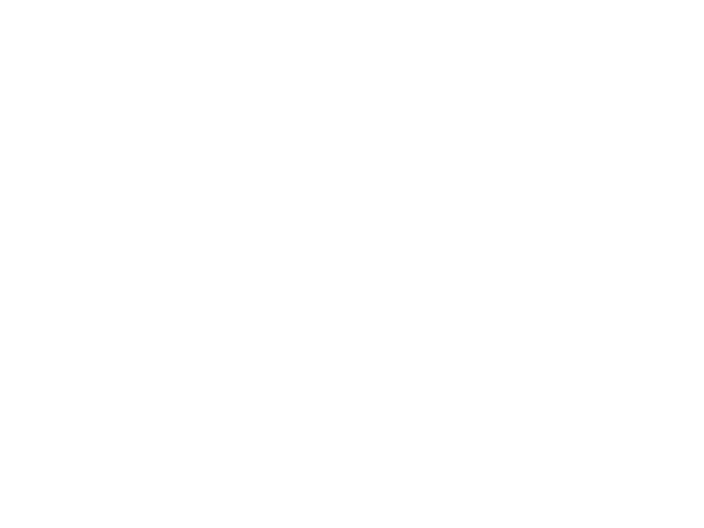

In [36]:
plt.imshow(test_px[0,:,:])

In [37]:
ranx = [0]

ranx2 = [64]

rany = [0]

rany2 = [64]

<IPython.core.display.Javascript object>


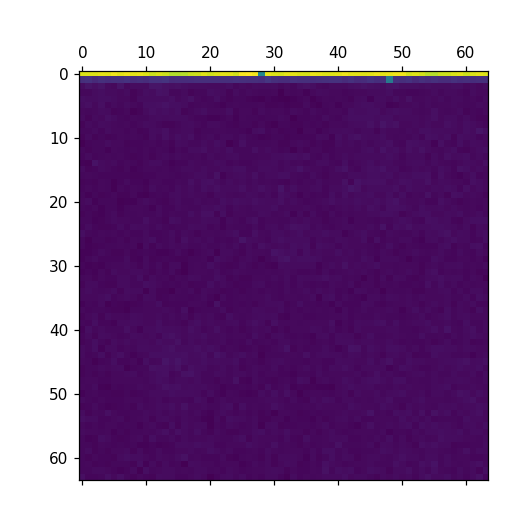

0


In [38]:
%matplotlib notebook
index=0
x1 = ranx[index]
x2 = ranx2[index]
y1 = rany[index]
y2 = rany2[index]
plt.matshow(test_px[0,y1:y2,x1:x2])
print x1

Multiple ROIs: run the cell below 

The cell following the next is the same as the one above, but has a second for loop to run through the multiple ROIs. 

The y values do not need to change. 

In [39]:
((548-395)/2+395)-64

ROI = ['left128','right128','top128','bottom128','control128']

ranx = [179, 755, 463, 463, 20]

ranx2 = [307, 883, 591, 591, 148]

rany = [407, 407, 75, 740, 750]

rany2 = [535, 535, 203, 868, 878]

In [40]:
#ROI = ['left128','right128','top128','bottom128','control128']

#ranx = [179, 755, 463, 463, 20]

#ranx2 = [307, 883, 591, 591, 148]

#rany = [407, 407, 75, 740, 750]

#rany2 = [535, 535, 203, 868, 878]


#####128x128 boxes

#ROI = ['T1128','T2128','T3128','T4128','T5128','T6128','T7128','T8128','T9128','T10128','B1128','B2128','B3128','B4128','B5128','B6128','B7128','B8128','B9128','B10128']

#ranx = [235, 235, 235, 235, 235,235, 235, 235, 235, 235, 235, 235, 235, 235, 235,235, 235, 235, 235, 235]

#ranx2 = [363,363, 363, 363, 363,363,363, 363, 363, 363, 363,363, 363, 363, 363,363,363, 363, 363, 363]

#rany = [304, 288, 272,256, 240,224, 208,192,176,160,468,484, 500,516, 532,548, 564,580,596,612]

#rany2 = [432, 416,400, 384, 368,352,336,320,304,288,596,612,628, 644, 660,676,692,708,724,740]

#20210825
#ROI = ['T1128','T2128','T3128','T4128','T5128','T6128','T7128','T8128','T9128','T10128','B1128','B2128','B3128','B4128','B5128','B6128','B7128','B8128','B9128','B10128']

#ranx = [242,242, 242,242, 242,242, 242, 242, 242, 242, 242, 242, 242, 242, 242,242, 242, 242, 242, 242]

#ranx2 = [370,370, 370, 370, 370,370,370, 370, 370, 370,370,370,370, 370,370,370,370,370, 370, 370]

#rany = [304, 288, 272,256, 240,224, 208,192,176,160,468,484, 500,516, 532,548, 564,580,596,612]

#rany2 = [432, 416,400, 384, 368,352,336,320,304,288,596,612,628, 644, 660,676,692,708,724,740]

###############################2/08/2022

#ROI = ['T1128','T2128','T3128','T4128','T5128','T6128','T7128','T8128','T9128','T10128','B1128','B2128','B3128','B4128','B5128','B6128','B7128','B8128','B9128','B10128']

#ranx = [221,221, 221,221, 221,221,221, 221,221, 221, 221,221, 221,221, 221,221,221, 221,221, 221]

#ranx2 = [349,349, 349, 349,349, 349,349,349, 349, 349,349, 349,349,349, 349,349,349, 349, 349,349]

#rany = [295, 279, 263,247, 231,215, 199,183,167,151,465,481, 497,513, 529,545, 561,577,593,609]

#rany2 = [423, 407,391, 375, 359,343,327,311,295,279,593,609,625, 641, 657,673,689,705,721,737]
##############################2/15/2022

ROI = ['T1128','T2128','T3128','T4128','T5128','T6128','T7128','T8128','T9128','T10128','B1128','B2128','B3128','B4128','B5128','B6128','B7128','B8128','B9128','B10128']

ranx = [221,221, 221,221, 221,221,221, 221,221, 221, 221,221, 221,221, 221,221,221, 221,221, 221]

ranx2 = [349,349, 349, 349,349, 349,349,349, 349, 349,349, 349,349,349, 349,349,349, 349, 349,349]

rany = [298, 282, 266,250, 234,218, 202,186,170,154,462,478, 494,510, 526,542, 558,574,590,606]

rany2 = [426, 410,394, 378, 362,346,330,314,298,282,590,606,622, 638, 654,670,686,702,718,734]
##############################

#ranx = [240,240, 240,240, 240,240,240, 240,240, 240, 240,240, 240,240, 240,240,240, 240,240, 240]

#ranx2 = [368,368, 368, 368, 368,368,368, 368, 368, 368,368,368,368, 368,368,368,368,368, 368, 368]

#rany = [307, 291, 275,259, 243,227, 211,195,179,163,471,487, 503,519, 535,551, 567,583,599,615]

#rany2 = [435, 419,403, 387, 371,355,339,323,307,291,599,615,631, 647, 663,679,695,711,727,743]

######64x64 boxes
#ROI = ['T164','T264','T364','T464','T564','T664','T764','T864','T964','T1064','B164','B264','B364','B464','B564','B664','B764','B864','B964','B1064']

#ranx = [267, 267, 267, 267, 267,267, 267, 267, 267, 267, 267, 267, 267, 267, 267,267, 267, 267, 267, 267]

#ranx2 = [331,331, 331, 331, 331,331,331, 331, 331, 331, 331,331, 331, 331, 331,331,331, 331, 331, 331]

#rany = [368, 352, 336,320, 304,288, 272,256,240,224,468,484, 500,516, 532,548, 564,580,596,612]

#rany2 = [432, 416,400, 384, 368,352,336,320,304,288,532,548,564, 580, 596,612,628,644,660,676]





#ROI = ['T6128','T7128','T8128','T9128','T10128','B1128','B2128','B3128','B4128','B5128','B6128','B7128','B8128','B9128','B10128']

#ranx = [235, 235, 235, 235, 235, 235, 235, 235, 235, 235,235, 235, 235, 235, 235]

#ranx2 = [363,363, 363, 363, 363, 363,363, 363, 363, 363,363,363, 363, 363, 363]

#rany = [224, 208,192,176,160,468,484, 500,516, 532,548, 564,580,596,612]

#rany2 = [352,336,320,304,288,596,612,628, 644, 660,676,692,708,724,740]



'''ROI = ['T1128','T2128','T3128','T4128','T5128','T6128','T7128','T8128','T9128','T10128']

ranx = [235, 235, 235, 235, 235,235, 235, 235, 235, 235]

ranx2 = [363,363, 363, 363, 363,363,363, 363, 363, 363]

rany = [304, 288, 272,256, 240,224, 208,192,176,160]

rany2 = [432, 416,400, 384, 368,352,336,320,304,288]'''

'''ROI = ['T1128','T2128','T3128','T4128','T5128']

ranx = [235, 235, 235, 235, 235]

ranx2 = [363,363, 363, 363, 363]

rany = [304, 288, 272,256, 240]

rany2 = [432, 416,400, 384, 368]'''

'''ROI = ['T1128']

ranx = [235]

ranx2 = [363]

rany = [304]

rany2 = [432]'''

'''ROI = ['T10128']

ranx = [235]

ranx2 = [363]

rany = [160]

rany2 = [288]
'''
#ROI = ['0','1','2','3']

#ranx = [0,256,0,256]
#ranx2= [256,512,256,512]

#rany= [0,0,256,256] ## y values

#rany2 = [256,256,512,512]

# you will want to change the initial y and end y values depending on the size of your video and where you want your ROI to be.
inty_value = 5

endy_value = 251

In [41]:
for i in range(len(rany)):
    print "x roi", ranx2[i]-ranx[i]
    print "y roi", rany2[i]-rany[i]


x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128
x roi 128
y roi 128


In [42]:
for i in range(len(files)):
    
    im = tiff_file.imread(files[i])
    
    for j in range(len(ROI)):
        print im.shape
        fft,dtsB = ddm.getFFTDiffsAtTimes(im[:,rany[j]:rany2[j],ranx[j]:ranx2[j]], dts, every=None, limitImsTo=None, submean=True)
        ravs = ddm.radialAvFFTs_v2(fft)
        #dts_fft = {'dts':dts, 'ravs':ravs} #without saving fft data in dict.
        dts_fft = {'dts':dts, 'ffts':fft, 'ravs':ravs}
        pickle.dump(dts_fft, open(files[i][:-4]+"_"+ROI[j]+"_FFTDIFFS_dts_ffts_ravs.p",'wb'))

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Running dt=210...

Running dt=225...

Running dt=240...

Running dt=270...

Running dt=300...

Running dt=315...

Running dt=330...

Running dt=345...

Running dt=360...

Running dt=390...

Running dt=405...

Running dt=420...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=540...

Running dt=555...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=825...

Running dt=870...

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Running dt=210...

Running dt=225...

Running dt=240...

Running dt=270...

Running dt=300...

Run

Running dt=240...

Running dt=270...

Running dt=300...

Running dt=315...

Running dt=330...

Running dt=345...

Running dt=360...

Running dt=390...

Running dt=405...

Running dt=420...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=540...

Running dt=555...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=825...

Running dt=870...

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Running dt=210...

Running dt=225...

Running dt=240...

Running dt=270...

Running dt=300...

Running dt=315...

Running dt=330...

Running dt=345...

Running dt=360...

Running dt=390...

Running dt=405...

Running dt=420...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=540...

Running dt=555...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=825...

Running dt=870...

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Running dt=210...

Running dt=225...

Running dt=240...

Running dt=270...

Running dt=300...

Running dt=315...

Running dt=330...

Running dt=345...

Running dt=360...

Running dt=390...

Running dt=405...

Running dt=420...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=540...

Running dt=555...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=825...

Running dt=870...

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Run

Running dt=150...

Running dt=165...

Running dt=180...

Running dt=210...

Running dt=225...

Running dt=240...

Running dt=270...

Running dt=300...

Running dt=315...

Running dt=330...

Running dt=345...

Running dt=360...

Running dt=390...

Running dt=405...

Running dt=420...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=540...

Running dt=555...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=825...

Running dt=870...

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Running dt=210...

Running dt=225...

Running dt=240...

Running dt=270...

Running dt=300...

Running dt=315...

Running dt=330...

Running dt=345...

Running dt=360...

Running dt=390...

Running dt=405...

Running dt=420...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=540...

Running dt=555...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=825...

Running dt=870...

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Running dt=210...

Running dt=225...

Running dt=240...

Running dt=270...

Running dt=300...

Running dt=315...

Running dt=330...

Running dt=345...

Running dt=360...

Running dt=390...

Running dt=405...

Running dt=420...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=540...

Running dt=555...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=825...

Running dt=870...

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Run

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Running dt=210...

Running dt=225...

Running dt=240...

Running dt=270...

Running dt=300...

Running dt=315...

Running dt=330...

Running dt=345...

Running dt=360...

Running dt=390...

Running dt=405...

Running dt=420...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=540...

Running dt=555...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=825...

Running dt=870...

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Running dt=210...

Running dt=225...

Running dt=240...

Running dt=270...

Running dt=300...

Running dt=315...

Running dt=330...

Running dt=345...

Running dt=360...

Running dt=390...



Running dt=345...

Running dt=360...

Running dt=390...

Running dt=405...

Running dt=420...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=540...

Running dt=555...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=825...

Running dt=870...

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Running dt=210...

Running dt=225...

Running dt=240...

Running dt=270...

Running dt=300...

Running dt=315...

Running dt=330...

Running dt=345...

Running dt=360...

Running dt=390...

Running dt=405...

Running dt=420...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=540...

Running dt=555...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=825...

Running dt=870...

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...


(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Running dt=210...

Running dt=225...

Running dt=240...

Running dt=270...

Running dt=300...

Running dt=315...

Running dt=330...

Running dt=345...

Running dt=360...

Running dt=390...

Running dt=405...

Running dt=420...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=540...

Running dt=555...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=825...

Running dt=870...

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Running dt=210...

Running dt=225...

Running dt=240...

Running dt=270...

Running dt=300...

Run

Running dt=240...

Running dt=270...

Running dt=300...

Running dt=315...

Running dt=330...

Running dt=345...

Running dt=360...

Running dt=390...

Running dt=405...

Running dt=420...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=540...

Running dt=555...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=825...

Running dt=870...

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Running dt=210...

Running dt=225...

Running dt=240...

Running dt=270...

Running dt=300...

Running dt=315...

Running dt=330...

Running dt=345...

Running dt=360...

Running dt=390...

Running dt=405...

Running dt=420...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=540...

Running dt=555...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=825...

Running dt=870...

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Running dt=210...

Running dt=225...

Running dt=240...

Running dt=270...

Running dt=300...

Running dt=315...

Running dt=330...

Running dt=345...

Running dt=360...

Running dt=390...

Running dt=405...

Running dt=420...

Running dt=465...

Running dt=480...

Running dt=510...

Running dt=540...

Running dt=555...

Running dt=570...

Running dt=645...

Running dt=765...

Running dt=825...

Running dt=870...

(3000L, 900L, 600L)
Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=135...

Running dt=150...

Running dt=165...

Running dt=180...

Run

Once this code has finished running continue on to Step 2. DDM fitting ravs to find taus